<a href="https://colab.research.google.com/github/Bao3333/MachineLearning/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets.cifar10 import load_data
(x_train, y_train), (x_test, y_test) = load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [2]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [3]:
# 這裡注意, 是(50000,1),是50000列, 1行
# 以後有可能一張照片裡面不只有一種東西 [[1, 2], [3], [4, 5]]
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [4]:
# y的轉換list
trans = [  
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck",
]

cat


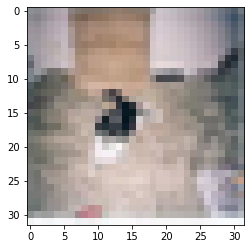

In [5]:
# 看一下圖片
import matplotlib.pyplot as plt
index = 10011
print(trans[y_train[index][0]])
plt.imshow(x_train[index])

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten

layers = [
    # Param 1792
    # 3 * 3 (9格)* 3(前一層通道數rgb) =27(一個過濾器)
    # 27 * 64(64個過濾器) + 64(bias) =1792
    Conv2D(64, 3, padding="same", activation="relu", input_shape=(32, 32, 3)),
    MaxPooling2D(),
    # Param = 3 * 3 * 64(1 filter) * 128 + 128(bias) = 73856
    Conv2D(128, 3, padding="same", activation="relu"),
    MaxPooling2D(),
    # Param = 3 * 3 * 128(1 filter) * 256 + 256(bias) = 295168
    Conv2D(256, 3, padding="same", activation="relu"),
    MaxPooling2D(),    
    Conv2D(512, 3, padding="same", activation="relu"),
    MaxPooling2D(),
    Flatten(),
    Dense(128, activation="relu"),
    # Param = 128 * 10 + 10 = 1290
    Dense(10, activation="softmax")
]
model = Sequential(layers)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 256)         295168    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 256)        0

In [7]:
# 前:預處理(ex:CNN) 後:分類器(ex:MLP)
# 前強後弱(係數的分配 -> 讓眼睛強一點,大腦弱一點) -> 使用GlobalAveragePooling(GAP, 將每層通道的值做平均)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.layers import Dense, Flatten

layers = [
    # Param 1792
    # 3 * 3 (9格)* 3(前一層通道數rgb) =27(一個過濾器)
    # 27 * 64(64個過濾器) + 64(bias) =1792
    Conv2D(64, 3, padding="same", activation="relu", input_shape=(32, 32, 3)),
    MaxPooling2D(),
    # Param = 3 * 3 * 64(1 filter) * 128 + 128(bias) = 73856
    Conv2D(128, 3, padding="same", activation="relu"),
    MaxPooling2D(),
    # Param = 3 * 3 * 128(1 filter) * 256 + 256(bias) = 295168
    Conv2D(256, 3, padding="same", activation="relu"),
    MaxPooling2D(),    
    Conv2D(512, 3, padding="same", activation="relu"),
    MaxPooling2D(),
    GlobalAveragePooling2D(),
    # Param = 128 * 10 + 10 = 1290
    Dense(10, activation="softmax")
]
model = Sequential(layers)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 8, 8, 256)         295168    
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 4, 4, 256)       

In [8]:
# x處理(CNN可以帶二維進去,所以不用reshape, 直接normalize即可)
x_train_norm = x_train / 255.0
x_test_norm = x_test / 255.0

In [9]:
# y處理
# 以前y是做one-hot encoding, 如果輸出是有幾千種幾萬種
# 輸出:3000 筆數: 50000 妳會有 50000 * 3000這麼多值
# 如果你這樣做, 妳會用掉一堆無謂的RAM, 
# 所以我們在compile的地方直接使用sparse, 妳說5, 他內部就會幫你搞定每一個位置的輸出 -> 就不用自己再做 one-hot encoding了

from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
model.compile(loss=SparseCategoricalCrossentropy(),
       optimizer=Adam(),
       metrics=["accuracy"])

In [10]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
callbacks = [
    ModelCheckpoint("cnn.h5", save_best_only=True),
    EarlyStopping(patience=5, restore_best_weights=True)
]
# 不想要進度條, verbose=2
model.fit(x_train_norm,
     y_train,
     batch_size=200,
     epochs=50,
     validation_split=0.1,
     callbacks=callbacks,
     )

Epoch 1/50
225/225 [==============================] - 17s 21ms/step - loss: 1.6499 - accuracy: 0.3879 - val_loss: 1.3376 - val_accuracy: 0.5124
Epoch 2/50
225/225 [==============================] - 5s 20ms/step - loss: 1.2360 - accuracy: 0.5557 - val_loss: 1.0583 - val_accuracy: 0.6228
Epoch 3/50
225/225 [==============================] - 5s 20ms/step - loss: 1.0257 - accuracy: 0.6375 - val_loss: 0.9798 - val_accuracy: 0.6552
Epoch 4/50
225/225 [==============================] - 5s 20ms/step - loss: 0.8646 - accuracy: 0.6983 - val_loss: 0.8828 - val_accuracy: 0.6946
Epoch 5/50
225/225 [==============================] - 5s 21ms/step - loss: 0.7762 - accuracy: 0.7287 - val_loss: 0.7413 - val_accuracy: 0.7466
Epoch 6/50
225/225 [==============================] - 5s 21ms/step - loss: 0.6789 - accuracy: 0.7617 - val_loss: 0.7878 - val_accuracy: 0.7328
Epoch 7/50
225/225 [==============================] - 5s 21ms/step - loss: 0.6188 - accuracy: 0.7844 - val_loss: 0.7267 - val_accuracy: 0.749

In [11]:
# 用沒看過的一萬筆作最終評估
model.evaluate(x_test_norm, y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.6785 - accuracy: 0.7737


[0.6784623861312866, 0.7736999988555908]

In [12]:
import pandas as pd
from sklearn.metrics import confusion_matrix
pre = model.predict(x_test_norm).argmax(axis=1)

# 因為要進其他的(sklearn, 畫圖)
# pre: 10000
# y_test: (10000, 1) -> 10000
y_test = y_test.reshape(10000)

mat = confusion_matrix(y_test, pre)
pd.DataFrame(mat,
             columns=[f"{trans[i]}(predict)" for i in range(10)],
             index=[f"{trans[i]}(true)" for i in range(10)]
             )

,airplane(predict),automobile(predict),bird(predict),cat(predict),deer(predict),dog(predict),frog(predict),horse(predict),ship(predict),truck(predict)
airplane(true),843,7,33,4,18,5,11,10,49,20
automobile(true),24,861,7,3,1,4,9,4,30,57
bird(true),61,1,721,31,52,40,58,23,8,5
cat(true),21,6,93,524,68,145,90,32,7,14
deer(true),13,2,75,27,738,29,68,37,8,3
dog(true),15,2,61,127,51,647,34,52,6,5
frog(true),3,1,46,16,18,6,899,2,4,5
horse(true),12,1,49,21,62,41,6,800,2,6
ship(true),41,13,19,12,5,5,8,4,882,11
truck(true),40,62,17,10,1,3,12,13,20,822


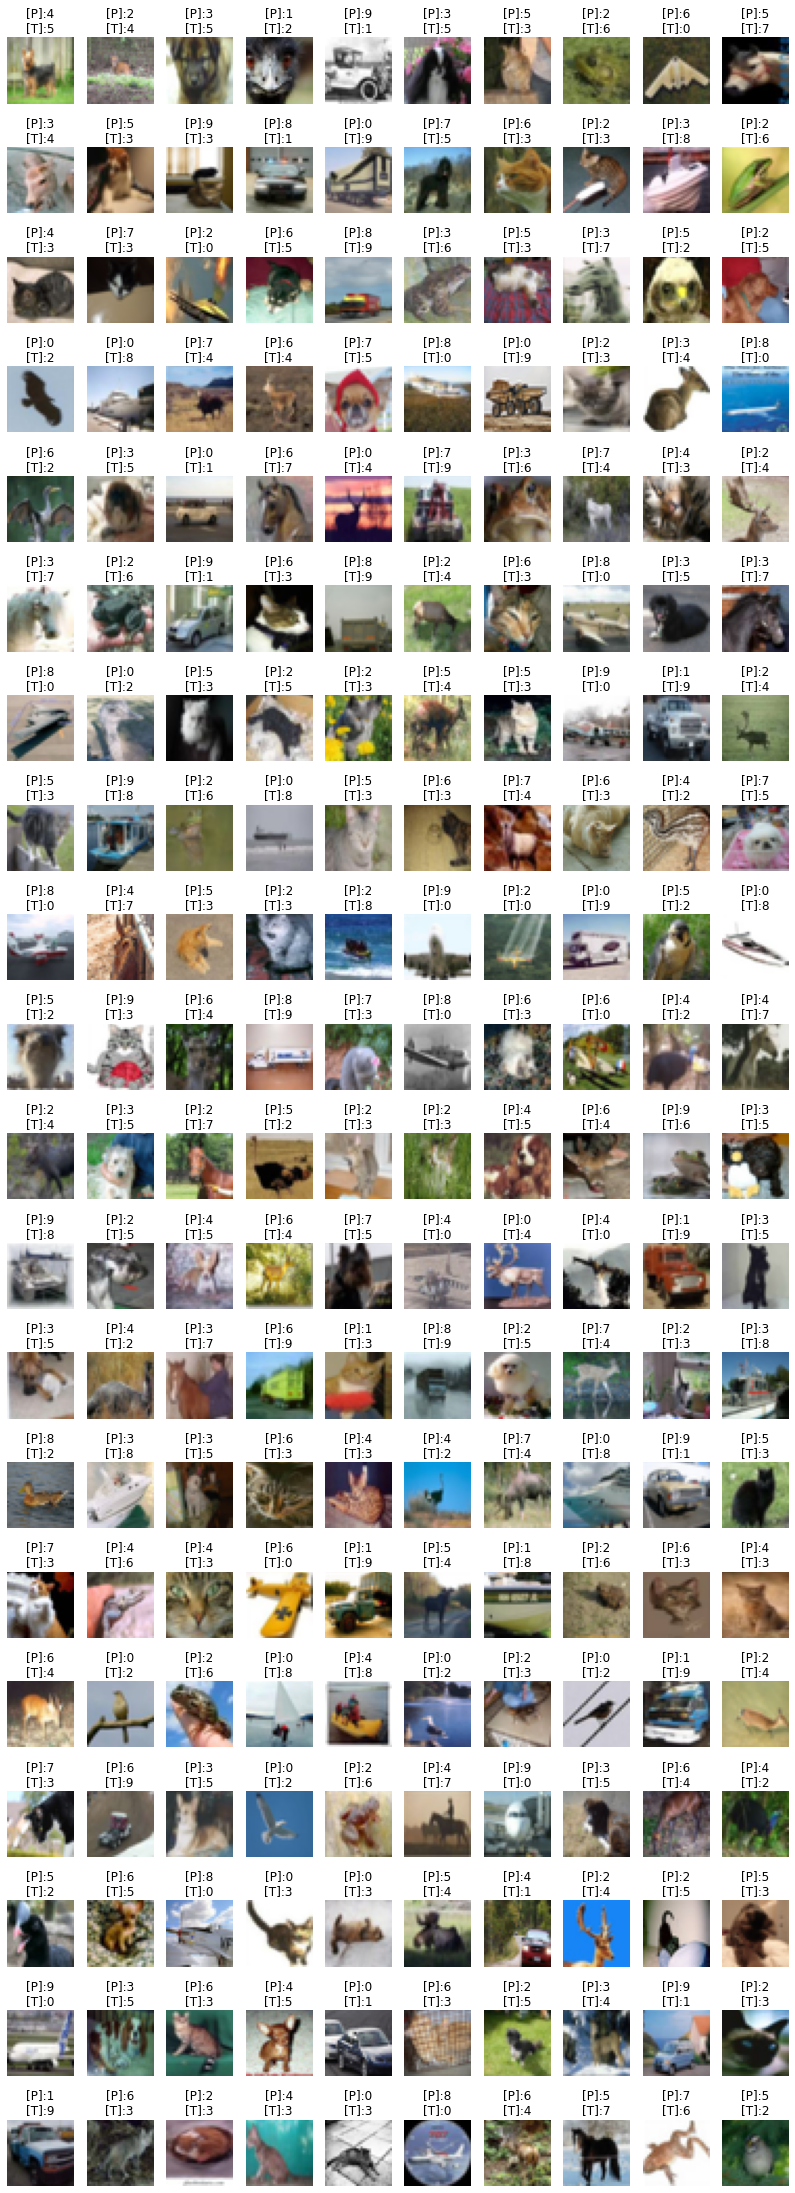

In [13]:
# subplot(總高度, 總寬度, ith[1,2,3])
# (2, 3, 1) (2, 3, 2) (2, 3, 3)
# (2, 3, 4) (2, 3, 5) (2, 3, 6)
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(14, 42))

idx = np.nonzero(pre != y_test)[0]
# 取前兩百筆就好
idx = idx[:200]
false_pre = pre[idx]
false_true = y_test[idx]
false_img = x_test[idx]

width = 10
height = len(idx) // width + 1

for i in range(len(idx)):
    plt.subplot(height, width, i+1)
    title = "[P]:{}\n[T]:{}".format(false_pre[i], 
                     false_true[i])
    plt.title(title)
    plt.axis("off")
    plt.imshow(false_img[i])